This notebook contains a code which is used for preparing of MODISa images

In [1]:
# import of required packages
from nansat import Nansat, Domain
import os
from glob import glob
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create new geolocation for MODIS-a image
def geolocation(mfile, domain, final_path):
    print mfile
    n = Nansat(mfile, GCP_COUNT=40)
    # Remove geolocation
    n.vrt.remove_geolocationArray()
    n.vrt.tps = True
    n.reproject_GCPs()
    print n.time_coverage_start

    # add index of pixels
    index = np.arange(0, n.shape()[0] * n.shape()[1]).reshape(n.shape()).astype('int32')
    n.add_band(index, parameters={'name': 'index'})

    n.reproject(domain, addmask=False)
    #bands = ['Rrs_412', 'Rrs_443', 'Rrs_488', 'Rrs_531', 'Rrs_547', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678', 'angstrom', 'aot_869', 'chlor_a']
    #bands = ['Rrs_667', 'Rrs_555', 'Rrs_488', 'Rrs_443', 'Rrs_412']
    bands = ['index', 'Rrs_412', 'Rrs_443', 'Rrs_488', 'Rrs_531', 'Rrs_555', 'Rrs_645', 'Rrs_667', 'Rrs_678']

    nexp = Nansat(domain=domain)
    for band in bands:
        print band,
        bandArray = n[band]
        print bandArray.dtype
        nexp.add_band(bandArray, parameters={'name': band})

    nexp.export(os.path.join(final_path, os.path.split(mfile)[1] + postfix))

geolocation = np.vectorize(geolocation)

In [3]:
# A path to store of MODISa data
mfile_root =  '/nfs0/data_ocolor/michigan/michigan1617/clear_data/MODISa/LAC_OC/'
# A path to accumulation of reprojected files
save_path = '/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/'
# postfix to identification of reprojected files
postfix = '_reprojected.nc'

# Get data list (list of filenames)
mfiles_list = np.array(glob('/nfs0/data_ocolor/michigan/michigan1617/clear_data/MODISa/LAC_OC/*'))

# Sandy Bear Dunes domain. For view follow ./requirements/michigan.geojson
pixel_size = 60 # pixel size in m
# x_resol, y_resol = 122 * (1000 / 60), 78 * (1000 / 60) # size in km
x_resol, y_resol = 122, 78
sbd_dom = Domain('+proj=latlong +datum=WGS84 +ellps=WGS84 +no_defs', '-lle -86.3 44.6 -85.2 45.3 -ts %i %i' % (x_resol, y_resol))

In [4]:
# processing
geolocation(mfiles_list, sbd_dom, save_path)

## TESTS

<IPython.core.display.Javascript object>


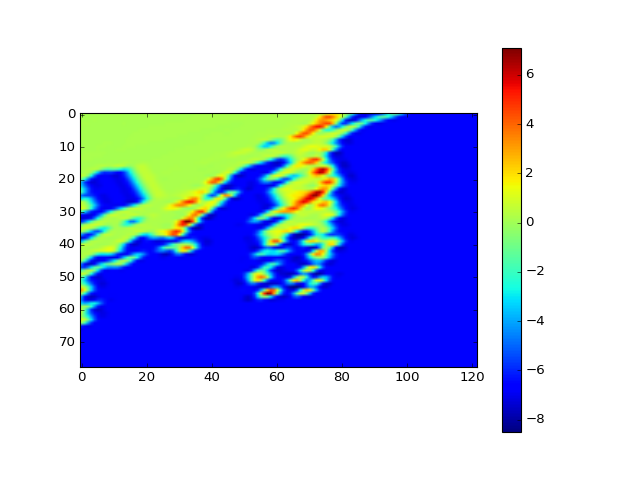

In [5]:
# bad case 
n = Nansat('data/A2016311175000.L2_LAC_OC.x.nc')
%matplotlib nbagg
n.reproject(sbd_dom, eResampleAlg=2)
plt.figure()
plt.imshow(n[1])
plt.colorbar()
plt.show()

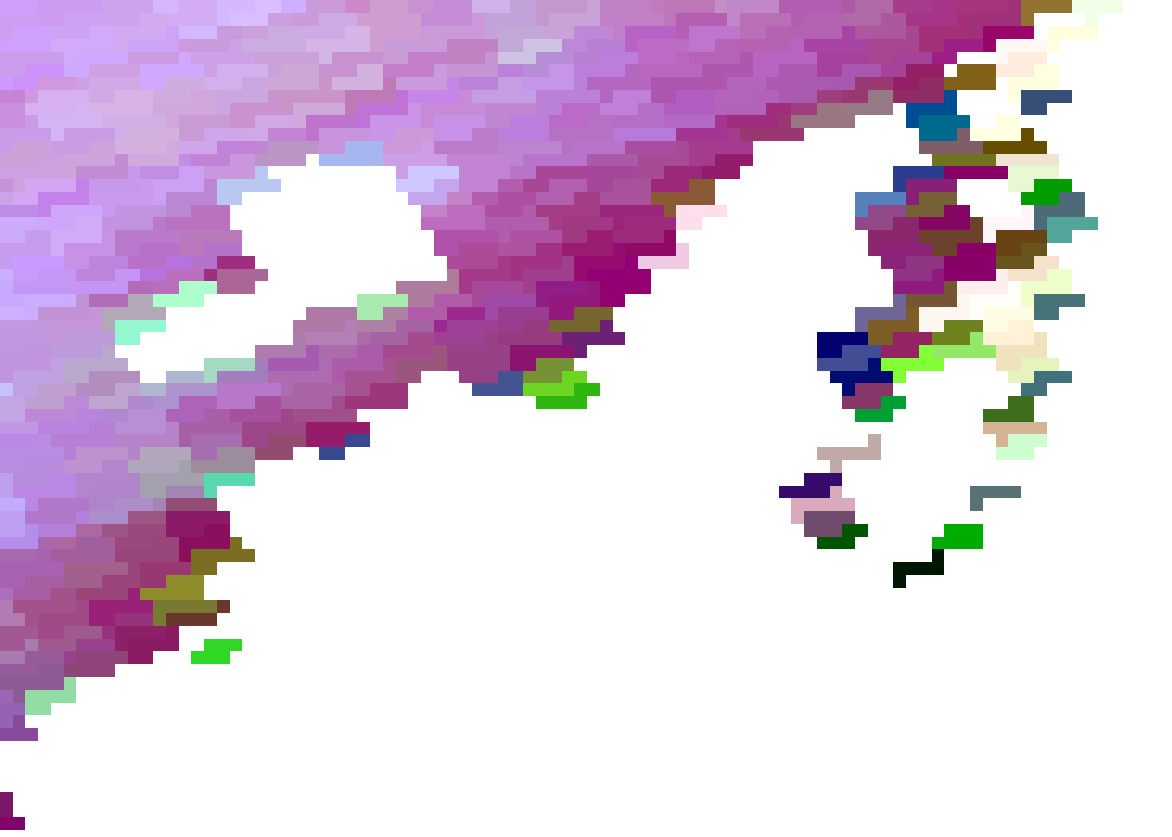

In [8]:
# reprojection by SeaDAS
from IPython.display import Image

Image(filename='data/A2016311175000_L2_LAC_OC_RGB.png')

<IPython.core.display.Javascript object>


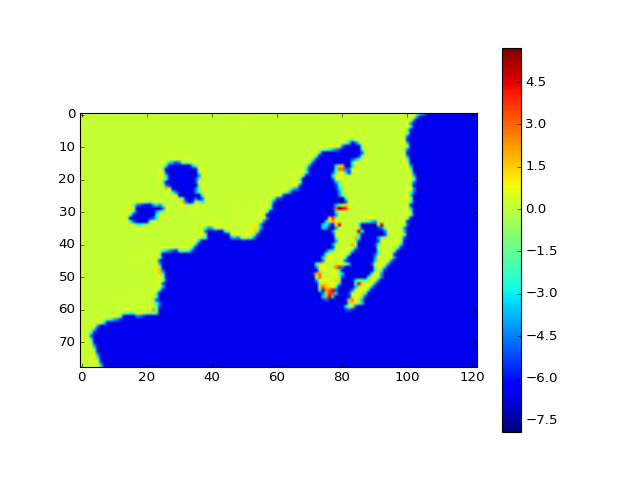

In [7]:
# good case
n = Nansat('data/A2016310184500.L2_LAC_OC.x.nc')
%matplotlib nbagg
n.reproject(sbd_dom, eResampleAlg=2)
plt.figure()
plt.imshow(n[1])
plt.colorbar()
plt.show()